In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.inception_v3 import InceptionV3

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input

import warnings
warnings.filterwarnings("ignore")
print("Module and Packages imported successfully.....!")

Module and Packages imported successfully.....!


In [2]:
train_dir = "C:/Users/Ganpati Kumar Roy/Desktop/5 Ocular Disease/Training/"
val_dir = "C:/Users/Ganpati Kumar Roy/Desktop/5 Ocular Disease/Validation/"

In [3]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count    

In [4]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
val_samples=get_files(val_dir) 
print("Classes are :- ", num_classes)
print("Total train images :-", train_samples)
print("Total validation images :-", val_samples)

Classes are :-  5
Total train images :- 5663
Total validation images :- 1397


In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, 
                                   horizontal_flip=True)

validation_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, 
                                   horizontal_flip=True)

In [6]:
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
validation_generator = validation_datagen.flow_from_directory(
                                                    val_dir, 
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size) 

Found 5663 images belonging to 5 classes.
Found 1397 images belonging to 5 classes.


In [7]:
train_generator.class_indices

{'Blindness': 0,
 'Diabetic Retinopathy': 1,
 'Glaucoma': 2,
 'Normal': 3,
 'Other Disease-Blindness': 4}

In [10]:
from keras.layers import BatchNormalization, Activation
inception = InceptionV3(input_shape=(256,256,3), weights = 'imagenet', include_top = False)
for layer in inception.layers:
    layer.trainable = False
    
x = Flatten()(inception.output)
x = Dense(1024, activation='relu')(x)
x = Dropout(rate=0.5)(x)
x = keras.layers.BatchNormalization()(x)
x = Dense(num_classes, activation = 'softmax')(x)
model = Model(inputs = inception.input, outputs = x)

model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 127, 127, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 127, 127, 32) 96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 127, 127, 32) 0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [11]:
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit(train_generator,
                          epochs=10,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          validation_steps= validation_generator.samples// batch_size,
                          verbose=1)

Epoch 1/10
176/176 [==============================] - 1429s 8s/step - loss: 0.6844 - accuracy: 0.7544 - val_loss: 0.4588 - val_accuracy: 0.8278
Epoch 2/10
176/176 [==============================] - 1213s 7s/step - loss: 0.4092 - accuracy: 0.8485 - val_loss: 0.3487 - val_accuracy: 0.8830
Epoch 3/10
176/176 [==============================] - 1191s 7s/step - loss: 0.3821 - accuracy: 0.8649 - val_loss: 0.3601 - val_accuracy: 0.8721
Epoch 4/10
176/176 [==============================] - 1238s 7s/step - loss: 0.3443 - accuracy: 0.8755 - val_loss: 0.3442 - val_accuracy: 0.8772
Epoch 5/10
176/176 [==============================] - 1258s 7s/step - loss: 0.3412 - accuracy: 0.8776 - val_loss: 0.4530 - val_accuracy: 0.8350
Epoch 6/10
176/176 [==============================] - 1337s 8s/step - loss: 0.3246 - accuracy: 0.8844 - val_loss: 0.3770 - val_accuracy: 0.8663
Epoch 7/10
176/176 [==============================] - 1346s 8s/step - loss: 0.3171 - accuracy: 0.8855 - val_loss: 0.3158 - val_accuracy:

In [12]:
from tensorflow.keras.models import load_model
model.save('5-O-D_Inception.h5')

In [13]:
train.history

{'loss': [0.6843782067298889,
  0.409166544675827,
  0.3820953965187073,
  0.3442918360233307,
  0.34116747975349426,
  0.3245700001716614,
  0.317140132188797,
  0.2985173761844635,
  0.31075429916381836,
  0.3057006299495697],
 'accuracy': [0.7543953061103821,
  0.848517119884491,
  0.8648552894592285,
  0.875510573387146,
  0.8776416182518005,
  0.8843899965286255,
  0.8854554891586304,
  0.8961108326911926,
  0.8888297080993652,
  0.8893624544143677],
 'val_loss': [0.4588150084018707,
  0.34870994091033936,
  0.3600510060787201,
  0.34418949484825134,
  0.4529903829097748,
  0.3770214915275574,
  0.3158332109451294,
  0.3222171664237976,
  0.3089640736579895,
  0.31652331352233887],
 'val_accuracy': [0.8277616500854492,
  0.8829941749572754,
  0.8720930218696594,
  0.8771802186965942,
  0.8350290656089783,
  0.8662790656089783,
  0.8786337375640869,
  0.8764534592628479,
  0.8851743936538696,
  0.8888081312179565]}

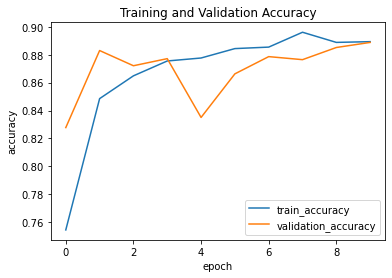

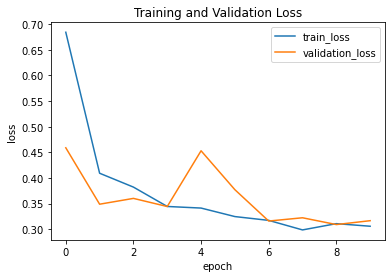

In [14]:
def plot_accuracy(train,title):
    plt.title(title)
    plt.plot(train.history['accuracy']) 
    plt.plot(train.history['val_accuracy']) 
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
    
def plot_loss(train,title):
    plt.title(title)
    plt.plot(train.history['loss'])
    plt.plot(train.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

    
plot_accuracy(train,'Training and Validation Accuracy')
plot_loss(train,'Training and Validation Loss')

In [28]:
# train_generator.reset()
predictions = model.predict_generator(generator = train_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = train_generator.classes

In [29]:
labels_map = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels_map.items())
predict = [labels[k] for k in y_pred]

filenames = train_generator.filenames
results = pd.DataFrame({"Filename":filenames,"Predictions":predict})

In [30]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y,predict_y):
    c = confusion_matrix(test_y, predict_y)
    cmap = sns.light_palette("yellow")
    plt.figure(figsize=(10,4))
    sns.heatmap(c, annot = True, cmap=cmap, fmt=".1f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

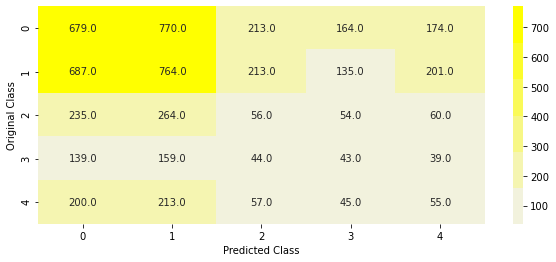

In [31]:
import seaborn as sns
plot_confusion_matrix(y_test, y_pred) 

In [32]:
validation_generator.reset()
predictions = model.predict_generator(generator = validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes

In [33]:
labels_map = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels_map.items())
predict = [labels[k] for k in y_pred]

filenames = validation_generator.filenames
results = pd.DataFrame({"Filename":filenames,"Predictions":predict})

In [34]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y,predict_y):
    c = confusion_matrix(test_y, predict_y)
    cmap = sns.light_palette("yellow")
    plt.figure(figsize=(10,4))
    sns.heatmap(c, annot = True, cmap=cmap, fmt=".1f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

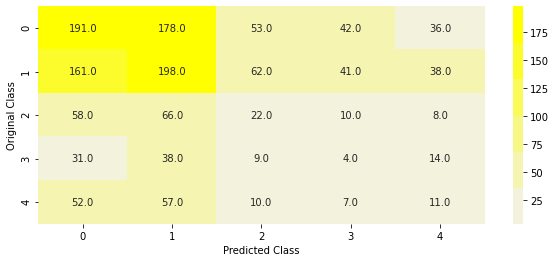

In [35]:
import seaborn as sns
plot_confusion_matrix(y_test, y_pred) 